# Example Notebook for Benchmax Result Inspection

In [1]:
# import the inspection module. You need to have benchmax installed for this to work.
import benchmax.inspection as bi

## Loading the data into a Pandas DataFrame

In [2]:
# the given file should be created with benchmax.
filename = "example.csv"

# you can rename the tools using a dict
solver_rename = {
    # "solver_in_csv": "solver_in_df",
    "smtrat/build/smtrat-static": "s1",
    "z3/build/z3" : "s2"
}

You can load data from CSV or XML files generated by `benchmax`.

The resulting DataFrame has a row for each benchmark instance, and the columns are structured into two levels.

That is, each column is a pair of the form `(tool, stat)`.

In [3]:
df = bi.csv_to_pandas(filename, rename=solver_rename)

# alternatively: xmls_to_pandas

After loading the data, you might need to do some post-processing to ensure that numerical columns are actually interpreted as such.

Also, watch out for NA or NAN values!

## Basic Summary

In [4]:
bi.inspect_answer(df)
# try also: inspect

,s1,s2
count,27,27
sat,19,19
unsat,6,7
unknown,0,0
wrong,0,0
error,0,0
timeout,2,1
memout,0,0
no answer,0,0
segmentation fault,0,0


## Filtering the Data

In [5]:
# only the rows where "solver" segfaults
segfaults_of_s = bi.inspect_segfaults(df, "s1")

# only the rows where "solver" gives a wrong result
wrongs_of_s = bi.inspect_wrongs(df, "s1")

# only the rows solved by "solver"
solved_by_s = bi.filter_solved(df, "s1")

For more advanced filtering, you can use something like this:

In [6]:
def filter_rows(df, pred):
    return df[df.apply(pred, axis=1)]


example_pred = lambda row: (
    row[("s1", "runtime")] < row[("s2", "runtime")] and row["s1", "runtime"] > 1000
)
filter_rows(df, example_pred).head()

s1                                       \
                            runtime peak_memory_kbytes   answer exitcode   
1A/Arthan1A-chunk-0023.smt2   13011              12880  timeout      143   

                                 s2                                       
                            runtime peak_memory_kbytes   answer exitcode  
1A/Arthan1A-chunk-0023.smt2   13014              44336  timeout      143

## Plots

<AxesSubplot: xlabel='number of solved instances', ylabel='runtime'>

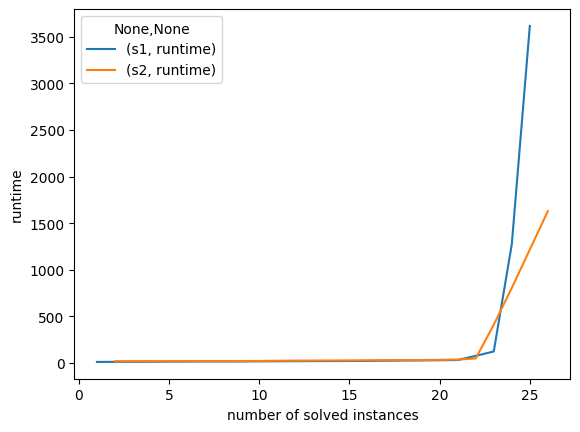

In [7]:
bi.performance_profile(df, bi.get_solvers(df))

The `scatter_plot` function can be used to compare a stat across two solvers.
Note that both `("s1", field)` and `("s2", field)` must be valid columns.

It is often useful to indicate the equal-line using `scatter_equal_line`.

Also, sometimes a log-log-scale provides more insights.

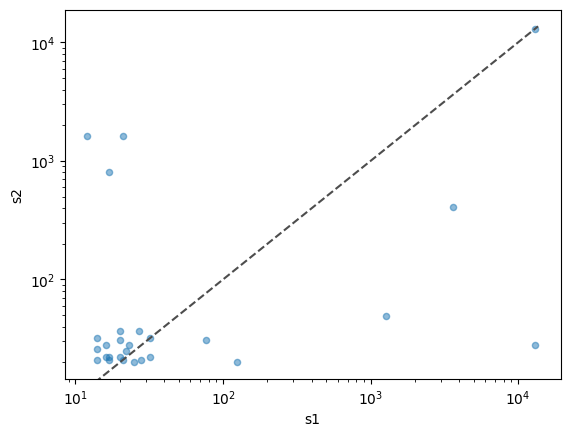

In [8]:
ax = bi.scatter_plot(df, "s1", "s2", field="runtime")
bi.scatter_equal_line(ax)

ax.set_xscale("log")
ax.set_yscale("log")

# save the plot to LaTeX with save_scatter

You can save scatter plots to LaTeX using `save_scatter`.
This relies on `tikzplotlib` and thus might not work, depending on your version of `matplotlib`.